In [16]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

In [17]:
secret_number = "10001011"

In [18]:
backend = GenericBackendV2(num_qubits=len(secret_number)+1)
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

In [19]:
qc = QuantumCircuit(len(secret_number)+1, len(secret_number))

qc.h(range(len(secret_number)))
qc.x(len(secret_number))
qc.h(len(secret_number))

qc.barrier()

for index, one in enumerate(secret_number[::-1]):
    if one == "1":
        qc.cx(index, len(secret_number))

qc.barrier()

qc.h(range(len(secret_number)))

qc.barrier()

qc.measure(range(len(secret_number)), range(len(secret_number)))

#qc.draw(output="mpl")

In [20]:
isa_circuit = pm.run(qc)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
pub_result = result[0]

/home/henning/.local/lib/python3.10/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:975: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


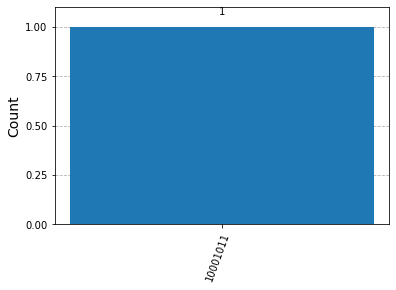

In [21]:
plot_histogram(pub_result.data.c.get_counts())

In [22]:
def classical_bernstein_vazirani(oracle_function, n):
    """
    Solve the Bernstein-Vazirani problem classically.

    Args:
        oracle_function: A function that implements f(x) = s · x (mod 2).
        n: The length of the secret string s.

    Returns:
        The secret string s as a binary string.
    """
    secret_string = ""
    for i in range(n):
        # Query the oracle with standard basis vector [0,...,1,...,0]
        x = 1 << i  # Binary representation of a standard basis vector
        result = oracle_function(x)
        secret_string = str(result) + secret_string  # Append result to the secret string
    
    return secret_string

# Oracle function: f(x) = s · x (mod 2)
def oracle_function(x, secret_string):
    """
    Simulates the oracle f(x) = s · x (mod 2).

    Args:
        x: Input to the oracle as an integer.
        secret_string: The secret string s as a binary string.

    Returns:
        Result of the dot product s · x (mod 2).
    """
    s = int(secret_string, 2)  # Convert binary string to integer
    return bin(s & x).count("1") % 2  # Compute s · x (mod 2)

# Define the secret string (e.g., "101")
secret_string = "10001011"
n = len(secret_string)

# Solve the problem using the classical approach
solved_string = classical_bernstein_vazirani(lambda x: oracle_function(x, secret_string), n)

# Output the result
print("Secret string found:", solved_string)


Secret string found: 10001011
